In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.0 (NVIDIA A40)


In [4]:
dataset_path = '/data1/icmr/shreyasi/brain_tumor_object_detection/axial_t1wce_2_class'

In [5]:
train_path = "/data1/icmr/shreyasi/yolov7/dataset/train"
test_path = "/data1/icmr/shreyasi/yolov7/dataset/test"

In [6]:
! cp {dataset_path}/images/train/* {train_path}/images/
! cp {dataset_path}/labels/train/* {train_path}/labels/
! cp {dataset_path}/images/test/* {test_path}/images/
! cp {dataset_path}/labels/test/* {test_path}/labels/

In [7]:
train_images = os.listdir(train_path+'/images')
test_images = os.listdir(test_path+'/images')

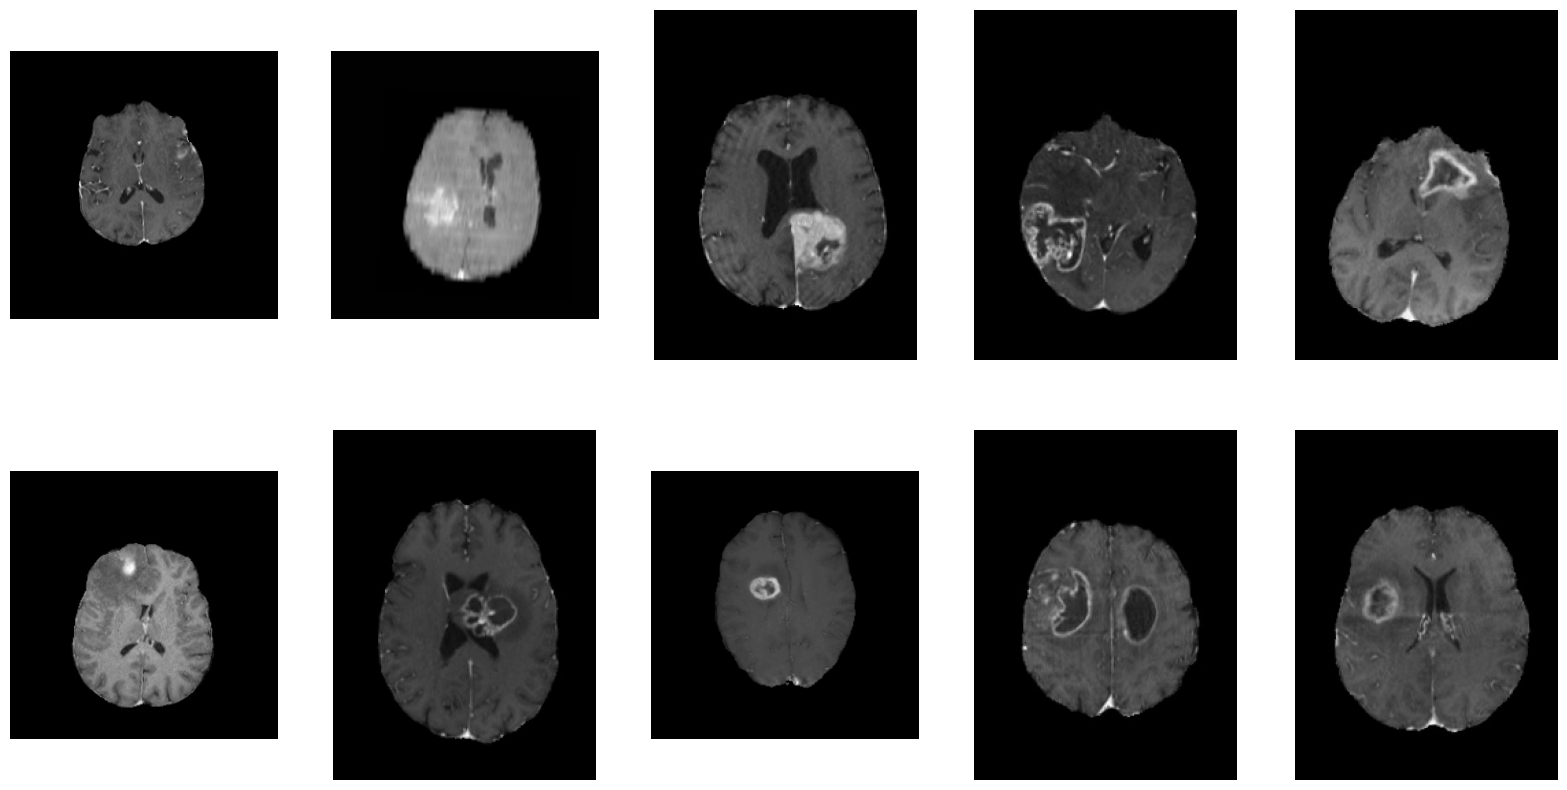

In [8]:
plt.figure(figsize=(20,10))
for i, c in enumerate(np.random.randint(0, len(train_images), size=10), start=1):
    plt.subplot(2,5,i)
    im = plt.imread(train_path+'/images/'+train_images[c])
    plt.axis('off')
    plt.imshow(im, cmap='gray')

In [9]:
text = """
train: /data1/icmr/shreyasi/yolov7/dataset/train
val: /data1/icmr/shreyasi/yolov7/dataset/test

# number of classes
nc: 2

# class names
names: ['negative','positive']
"""
with open("/data1/icmr/shreyasi/yolov7/data/coco.yaml", 'w') as file:
    file.write(text)

In [10]:
!wandb disabled

/bin/bash: line 1: wandb: command not found


In [11]:
! python /data1/icmr/shreyasi/yolov7/train.py --weights /data1/icmr/shreyasi/yolov7/yolov7.pt --cfg /data1/icmr/shreyasi/yolov7/cfg/training/yolov7.yaml --data /data1/icmr/shreyasi/yolov7/data/coco.yaml \
    --batch-size 16 --epochs 100 --img-size 640 640 --hyp /data1/icmr/shreyasi/yolov7/data/hyp.scratch.custom.yaml --name run

YOLOR 🚀 v0.1-128-ga207844 torch 2.3.0 CUDA:0 (NVIDIA A40, 45403.1875MB)
                                      CUDA:1 (NVIDIA A40, 45403.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='/data1/icmr/shreyasi/yolov7/cfg/training/yolov7.yaml', data='/data1/icmr/shreyasi/yolov7/data/coco.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='/data1/icmr/shreyasi/yolov7/data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='run', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/run', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='/data1/icmr/shreyasi/yolov7/yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensor

In [12]:
! ls /data1/icmr/shreyasi/runs/train/run

confusion_matrix.png
events.out.tfevents.1717239196.cloud1.cds.iisc.ac.in.733057.0
F1_curve.png
hyp.yaml
opt.yaml
P_curve.png
PR_curve.png
R_curve.png
results.png
results.txt
test_batch0_labels.jpg
test_batch0_pred.jpg
test_batch1_labels.jpg
test_batch1_pred.jpg
test_batch2_labels.jpg
test_batch2_pred.jpg
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
train_batch3.jpg
train_batch4.jpg
train_batch5.jpg
train_batch6.jpg
train_batch7.jpg
train_batch8.jpg
train_batch9.jpg
weights


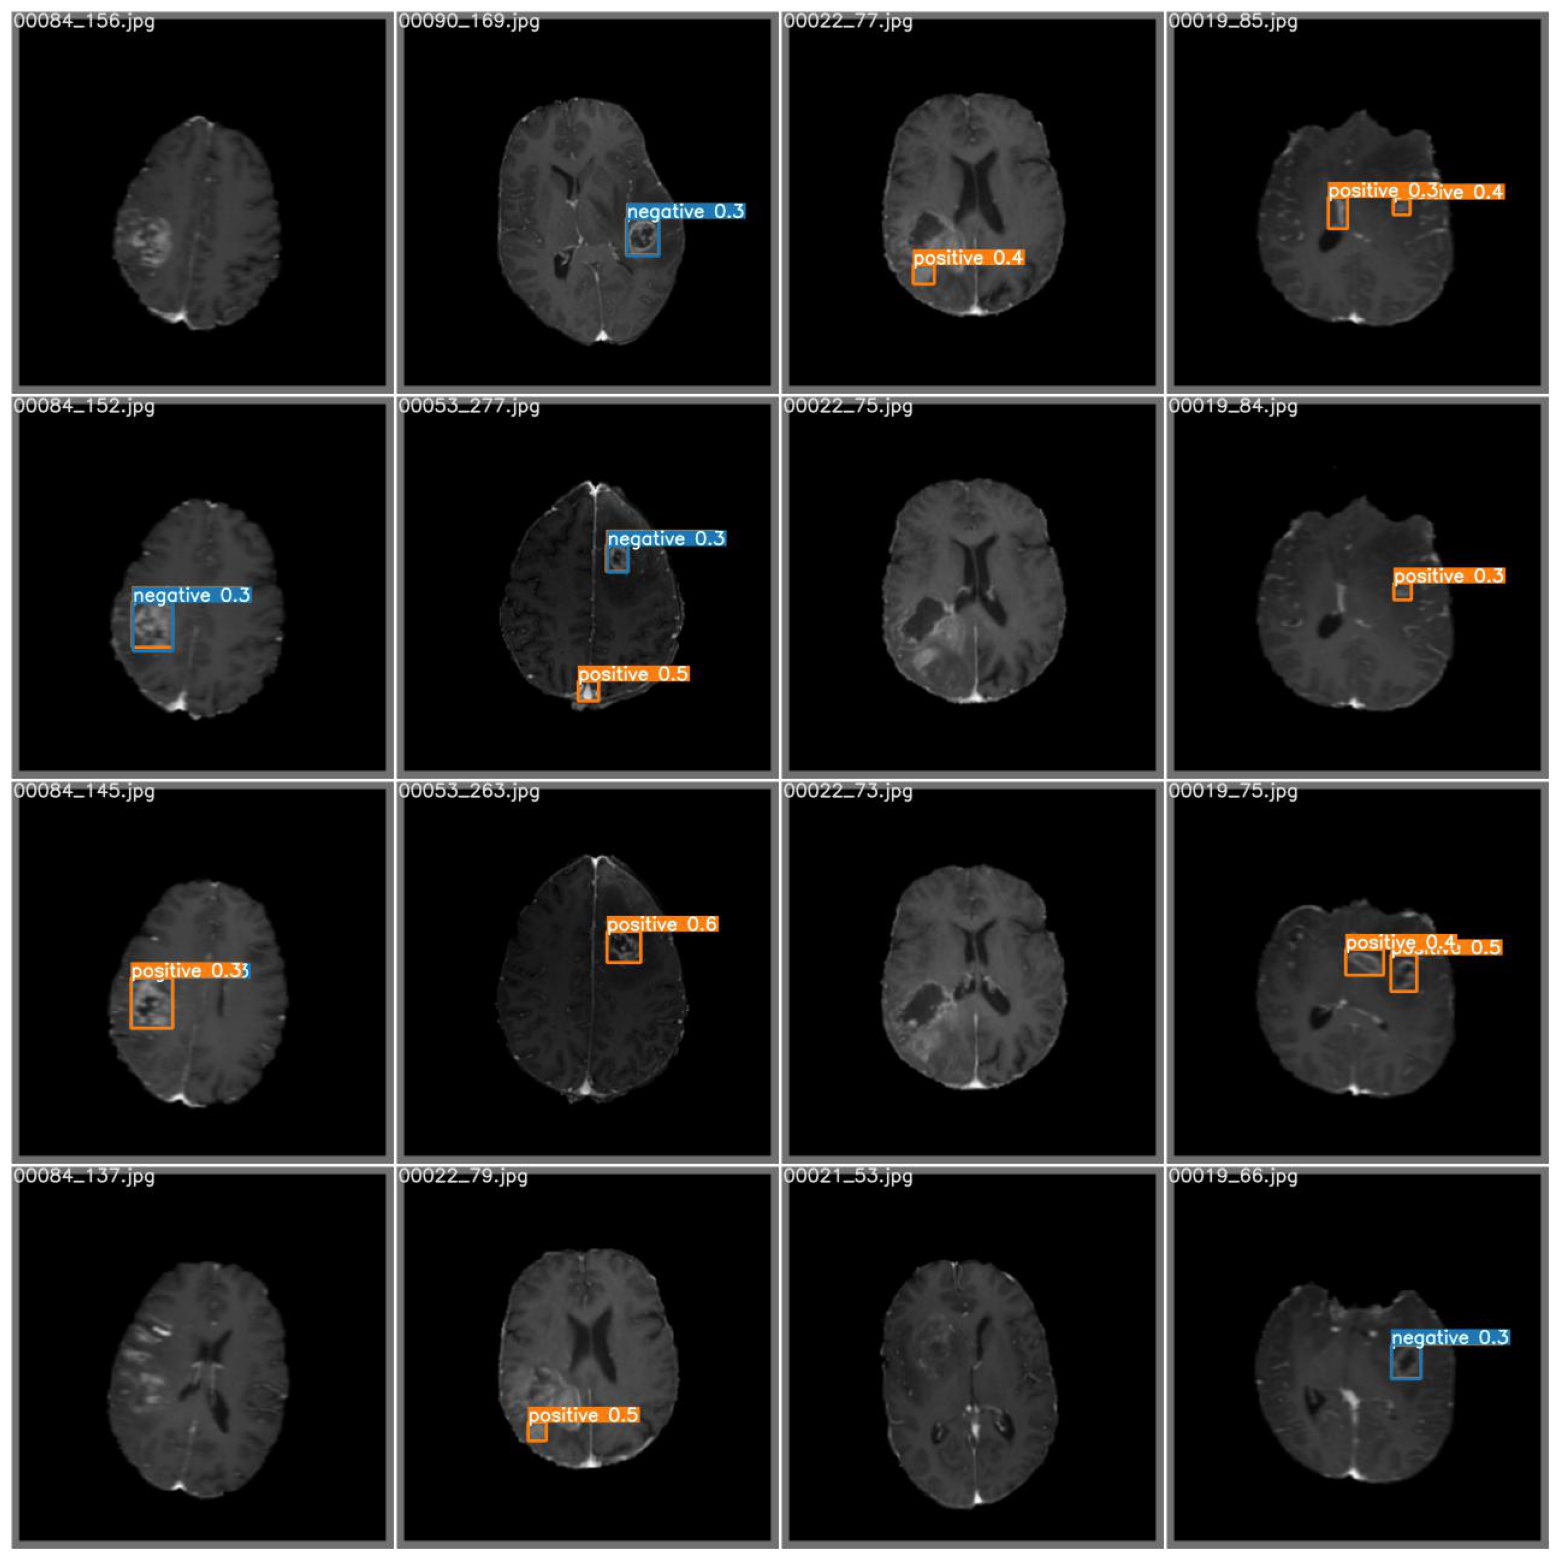

In [13]:
img = plt.imread('/data1/icmr/shreyasi/runs/train/run/test_batch1_pred.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
predict_dir="/data1/icmr/shreyasi/yolov7/predict"

In [20]:
! cp /data1/icmr/shreyasi/brain_tumor_object_detection/predict/080124AIIMSD00001/* /data1/icmr/shreyasi/yolov7/predict

In [22]:
img = random.choice(test_images)
! python /data1/icmr/shreyasi/yolov7/detect.py  --weights /data1/icmr/shreyasi/runs/train/run/weights/best.pt --conf 0.5 --img-size 640 --source {predict_dir} --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/data1/icmr/shreyasi/yolov7/predict', update=False, view_img=False, weights=['/data1/icmr/shreyasi/runs/train/run/weights/best.pt'])
YOLOR 🚀 v0.1-128-ga207844 torch 2.3.0 CUDA:0 (NVIDIA A40, 45403.1875MB)
                                      CUDA:1 (NVIDIA A40, 45403.1875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/icmr/anaconda3/envs/samyolo/lib/python3.8/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608851799/work/aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-define

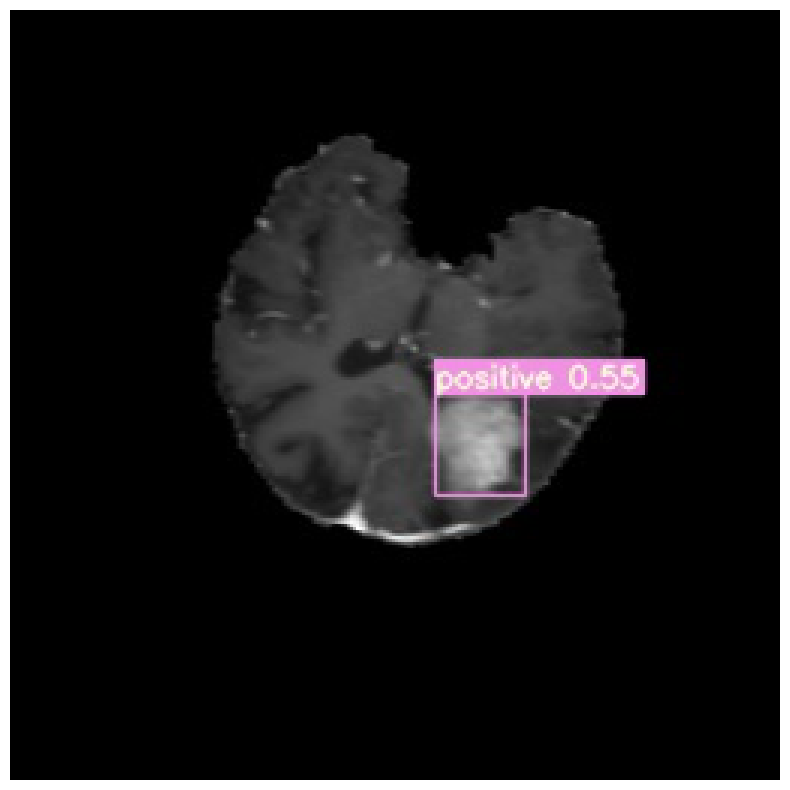

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
im = plt.imread('/data1/icmr/shreyasi/runs/detect/exp3/00081_98.jpg')
plt.axis('off')
plt.imshow(im)